In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2


from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from tqdm import tqdm
import pandas as pd

In [ ]:
def show_img(path, resize = None):
  img = cv2.equalizeHist(cv2.imread(path, 0))
  if resize != None:
    img = cv2.resize(img, resize, interpolation = cv2.INTER_NEAREST)
  return img

def over_sampling(class0, class1, class2, class3, class4, class5, class6):
  
  len0 = len(os.listdir(class0))
  len1 = len(os.listdir(class1))
  len2 = len(os.listdir(class2))
  len3 = len(os.listdir(class3))
  len4 = len(os.listdir(class4))
  len5 = len(os.listdir(class5))
  len6 = len(os.listdir(class6)) 

  res_df = pd.DataFrame()

  df_class0 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class0):
      img_path = os.path.join(class0, i)
      df_class0["images"].append(show_img(img_path, (224, 224)))
      df_class0["label"].append(0)
  df_class0 = pd.DataFrame(df_class0)

  df_class1 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class1):
      img_path = os.path.join(class1, i)
      df_class1["images"].append(show_img(img_path, (224, 224)))
      df_class1["label"].append(1)
  df_class1 = pd.DataFrame(df_class1)
  df_class1 = df_class1.sample(400, replace = True, random_state = 42)

  df_class2 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class2):
      img_path = os.path.join(class2, i)
      df_class2["images"].append(show_img(img_path, (224, 224)))
      df_class2["label"].append(2)
  df_class2 = pd.DataFrame(df_class2)

  df_class3 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class3):
      img_path = os.path.join(class3, i)
      df_class3["images"].append(show_img(img_path, (224, 224)))
      df_class3["label"].append(3)
  df_class3 = pd.DataFrame(df_class3)

  df_class4 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class4):
      img_path = os.path.join(class4, i)
      df_class4["images"].append(show_img(img_path, (224, 224)))
      df_class4["label"].append(4)
  df_class4 = pd.DataFrame(df_class4)


  df_class5 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class5):
      img_path = os.path.join(class5, i)
      df_class5["images"].append(show_img(img_path, (224, 224)))
      df_class5["label"].append(5)
  df_class5 = pd.DataFrame(df_class5)

  df_class6 = {
        "images": [],
        "label": []
    }
  for i in os.listdir(class6):
      img_path = os.path.join(class6, i)
      df_class6["images"].append(show_img(img_path, (224, 224)))
      df_class6["label"].append(6)
  df_class6 = pd.DataFrame(df_class6)
  df_class6 = df_class6.sample(400, replace = True, random_state = 42)

  print("EA: ", df_class0.count())
  print("EH_Complex: ", df_class1.count())
  print("EH_Simple: ", df_class2.count())
  print("EP: ", df_class3.count())
  print("NE_Follicular: ", df_class4.count())
  print("NE_Luteal: ", df_class5.count())
  print("NE_Menstrual: ", df_class6.count())
  
  res_df = pd.concat([df_class0, df_class1, df_class2, df_class3, df_class4, df_class5, df_class6], axis = 0)
  return (np.array(list(res_df["images"])), np.array(res_df["label"]))

over_x, over_y = over_sampling("/content/drive/MyDrive/Tarp/Dataset/EA", "/content/drive/MyDrive/Tarp/Dataset/EH_Complex", "/content/drive/MyDrive/Tarp/Dataset/EH_Simple",
                               "/content/drive/MyDrive/Tarp/Dataset/EP", "/content/drive/MyDrive/Tarp/Dataset/NE_Follicular", "/content/drive/MyDrive/Tarp/Dataset/NE_Luteal", 
                               "/content/drive/MyDrive/Tarp/Dataset/NE_Menstrual")

EA:  images    400
label     400
dtype: int64
EH_Complex:  images    400
label     400
dtype: int64
EH_Simple:  images    400
label     400
dtype: int64
EP:  images    400
label     400
dtype: int64
NE_Follicular:  images    400
label     400
dtype: int64
NE_Luteal:  images    400
label     400
dtype: int64
NE_Menstrual:  images    400
label     400
dtype: int64


In [ ]:
over_x.shape

(2800, 224, 224)

In [ ]:
equalized_imgs_x = np.repeat(over_x[..., np.newaxis], 3, -1)
equalized_imgs_x.shape

(2800, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    equalized_imgs_x, over_y, test_size=0.33, random_state=42, stratify = over_y)

In [ ]:
x_train.shape

(1876, 224, 224, 3)

In [ ]:
x_test.shape

(924, 224, 224, 3)

In [ ]:
y_train.shape, sum(y_train == 0), sum(y_train == 1)

((1876,), 268, 268)

In [ ]:
y_test.shape, sum(y_test == 0), sum(y_test == 1)

((924,), 132, 132)

In [ ]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation, RandomContrast
import tensorflow as tf

In [ ]:
data_augmentation = Sequential([
  RandomFlip('horizontal_and_vertical'),
  RandomRotation(10),
  RandomTranslation(width_factor=0.2, height_factor=0.2),
  RandomContrast(factor=0.2)
])

preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [ ]:
def model_result(funcs, aug = False):

  res_df = pd.DataFrame()
  res_df["Convolution Model"] = pd.Series([])
  res_df["Accuracy"] = pd.Series([])
  res_df["True Negatives"] = pd.Series([])
  res_df["False Negatives"] = pd.Series([])
  res_df["True Positives"] = pd.Series([])
  res_df["False Positives"] = pd.Series([])

  for i in funcs:
    base_model = i
    #Load model without classifier/fully connected layers
    inp_model = base_model(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )
    #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
    for layer in inp_model.layers:
      layer.trainable = False
    
    if aug == True:
      inputs = Input(shape=(224, 224, 3))
      x = data_augmentation(inputs)
      # x = preprocess_input(inputs)
      outputs = inp_model(x)
      inp_model = tf.keras.Model(inputs, outputs)
    # inp_model.summary()  #Trainable parameters will be 0

    #Now, let us use features from convolutional network for RF
    feature_extractor = inp_model.predict(x_train)

    features = feature_extractor.reshape(feature_extractor.shape[0], -1)

    X_for_RF = features #This is our X input to RF

    #RANDOM FOREST
    from sklearn.ensemble import RandomForestClassifier
    RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

    # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Send test data through same feature extractor process
    X_test_feature = inp_model.predict(x_test)
    X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)

    #Print overall accuracy
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, prediction_RF)
    print ("Accuracy = ", acc)

    #Confusion Matrix - verify accuracy of each class
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, prediction_RF)
    #print(cm)
    # sns.heatmap(cm, annot=True)
    res_df.loc[len(res_df)] = [str(i), acc, cm[0][0], cm[1][0], cm[1][1], cm[0][1]]
    print(res_df.loc[len(res_df) - 1])
    #Check results on a few select images
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature= inp_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0]
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", y_test[n])
  
  return res_df

In [ ]:
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.resnet import ResNet101, ResNet152
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
cnn_models = [NASNetMobile, ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2, InceptionV3, Xception, VGG16, VGG19]

<ipython-input-29-be2fe6d6acc9>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Convolution Model"] = pd.Series([])
<ipython-input-29-be2fe6d6acc9>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["Accuracy"] = pd.Series([])
<ipython-input-29-be2fe6d6acc9>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["True Negatives"] = pd.Series([])
<ipython-input-29-be2fe6d6acc9>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res_df["False Negatives"] = pd.Series([])
<ipython-input-29-be2fe6d6

29/29 [==============================] - 2s 59ms/step
Accuracy =  0.5151515151515151
Convolution Model    <function NASNetMobile at 0x7f32c0e9d430>
Accuracy                                              0.515152
True Negatives                                            45.0
False Negatives                                            7.0
True Positives                                            94.0
False Positives                                            0.0
Name: 0, dtype: object
1/1 [==============================] - 0s 257ms/step
The prediction for this image is:  0
The actual label for this image is:  4
29/29 [==============================] - 3s 109ms/step
Accuracy =  0.6558441558441559
Convolution Model    <function ResNet50 at 0x7f32c0e9dee0>
Accuracy                                          0.655844
True Negatives                                       111.0
False Negatives                                       20.0
True Positives                                        93.0
Fals

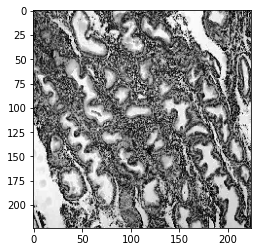

In [ ]:
cnn_models_100x = model_result(cnn_models)

In [ ]:
print(cnn_models_100x)

                            Convolution Model  Accuracy  True Negatives  \
0   <function NASNetMobile at 0x7f32c0e9d430>  0.515152            45.0   
1       <function ResNet50 at 0x7f32c0e9dee0>  0.655844           111.0   
2      <function ResNet101 at 0x7f32c0e9df70>  0.649351           106.0   
3      <function ResNet152 at 0x7f32c0ea4040>  0.642857           109.0   
4     <function ResNet50V2 at 0x7f32c0ea4ee0>  0.537879            57.0   
5    <function ResNet101V2 at 0x7f32c0eb2040>  0.549784            56.0   
6    <function ResNet152V2 at 0x7f32c0eb20d0>  0.545455            62.0   
7    <function InceptionV3 at 0x7f32c0f059d0>  0.501082            40.0   
8       <function Xception at 0x7f32c0eb2820>  0.540043            45.0   
9          <function VGG16 at 0x7f32c0eb2280>  0.627706           118.0   
10         <function VGG19 at 0x7f32c0eb2550>  0.659091           115.0   

    False Negatives  True Positives  False Positives  
0               7.0            94.0         